In [58]:
import pandas as pd
#Reading each csv file AND creating Dataframe
states0 = pd.read_csv('./states0.csv',delimiter=',',index_col=0)
states0_df = pd.DataFrame(states0)
states1 = pd.read_csv('./states1.csv',delimiter=',',index_col=0)
states1_df = pd.DataFrame(states1)
states2 = pd.read_csv('./states2.csv',delimiter=',',index_col=0)
states2_df = pd.DataFrame(states2)
states3 = pd.read_csv('./states3.csv',delimiter=',',index_col=0)
states3_df = pd.DataFrame(states3)
states4 = pd.read_csv('./states4.csv',delimiter=',',index_col=0)
states4_df = pd.DataFrame(states4)
states5 = pd.read_csv('./states5.csv',delimiter=',',index_col=0)
states5_df = pd.DataFrame(states5)
states6 = pd.read_csv('./states6.csv',delimiter=',',index_col=0)
states6_df = pd.DataFrame(states6)
states7 = pd.read_csv('./states7.csv',delimiter=',',index_col=0)
states7_df = pd.DataFrame(states7)
states8 = pd.read_csv('./states8.csv',delimiter=',',index_col=0)
states8_df = pd.DataFrame(states8)
states9 = pd.read_csv('./states9.csv',delimiter=',',index_col=0)
states9_df = pd.DataFrame(states9)





In [59]:
us_census = pd.concat([states0_df,states1_df,states2_df,states3_df,states4_df,states5_df,states6_df,states7_df,states8_df,states9_df],axis=0)
us_census.index = [x for x in range(1, len(us_census.values)+1)]


In [60]:
us_census.head()

State  TotalPop             Hispanic                White  \
1     Alabama   4830620  3.7516156462584975%     61.878656462585%   
2      Alaska    733375   5.909580838323351%  60.910179640718574%   
3     Arizona   6641928  29.565921052631502%  57.120000000000026%   
4    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
5  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
1   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
2  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
3  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
4  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
5   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
1  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
2   1.0586826347305378%  $70354.74390243902      384160M_349215F  
3  0.16763157894736833%  $54207.82095490716    3299088M_3342840F  
4  0.14686131386861315%  $41935.63396778917    1451913M_1506295F  
5  0.35141038442336353%  $67264.78230266465  19087135M_19334329F

In [61]:

# Dividing the GenderPop to Female And Male
us_census[['Male', 'Female']] = us_census["GenderPop"].apply(lambda x: pd.Series(str(x).split("_")))
us_census = us_census.drop(['GenderPop'],axis=1)


In [62]:
import numpy as np
#Removing the % Sign for Races
columns = ['Hispanic','White','Black','Native','Asian','Pacific']
for column in columns:
    us_census[column] = us_census[column].str.rstrip('%').astype('float')

#Making Changes to the Female and Male Columns to turn it into Float
us_census['Male']=us_census['Male'].str.replace('M', '')
us_census['Female']=us_census['Female'].str.replace('F', '')
us_census['Female'] = us_census['Female'].replace('',np.nan).astype(float)
us_census['Male'] = us_census['Male'].replace('',np.nan).astype(float)
us_census['Income']=us_census['Income'].str.replace('$', '')
us_census['Income'] = us_census['Income'].replace('',np.nan).astype(float)
us_census.dtypes


C:\Users\Eisha Fatima\AppData\Local\Temp\ipykernel_11184\553142390.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income']=us_census['Income'].str.replace('$', '')


State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male        float64
Female      float64
dtype: object

In [63]:
#Filling missing Female Column Values
us_census['Female'] = us_census['Female'].fillna(us_census['TotalPop']-us_census['Male'])
us_census

State  TotalPop   Hispanic      White      Black  \
1                Alabama   4830620   3.751616  61.878656  31.252976   
2                 Alaska    733375   5.909581  60.910180   2.848503   
3                Arizona   6641928  29.565921  57.120000   3.850987   
4               Arkansas   2958208   6.215474  71.137810  18.968759   
5             California  38421464  37.291875  40.215789   5.677396   
6               Colorado   5278906  20.784380  69.895572   3.546377   
7               Colorado   5278906  20.784380  69.895572   3.546377   
8            Connecticut   3593222  15.604831  67.677053  10.348068   
9               Delaware    926454   8.824766  64.632710  20.743925   
10  District of Columbia    647484   9.165922  33.103911  51.776536   
11               Florida  19645772  21.338543  59.083749  15.165676   
12               Georgia  10006693   8.418242  54.286306  32.088298   
13               Georgia  10006693   8.418242  54.286306  32.088298   
14                Hawaii   1406299   9.186709  25.032278   2.052848   
15                 Idaho   1616547  11.505369  83.136242   0.566779   
16              Illinois  12873761  15.601734  60.859807  17.108411   
17               Indiana   6568645   6.536744  78.431894  11.186977   
18                  Iowa   3093526   5.303645  87.719684   3.256987   
19                  Iowa   3093526   5.303645  87.719684   3.256987   
20                Kansas   2892987  11.644342  75.958289   6.567895   
21              Kentucky   4397353   3.222994  85.230748   8.272317   
22             Louisiana   4625253   4.866489  54.978546  36.326241   
23                 Maine   1329100   1.431909  93.707407   1.134473   
24              Maryland   5930538   8.472498  52.679050  30.677754   
25              Maryland   5930538   8.472498  52.679050  30.677754   
26         Massachusetts   6705586  11.461066  73.041052   6.833128   
27              Michigan   9900571   4.634993  72.381722  17.633103   
28             Minnesota   5419171   5.152924  81.427061   5.659820   
29           Mississippi   2988081   2.842401  53.286322  41.491945   
30              Missouri   6045448   4.037248  77.508069  14.122118   
31              Missouri   6045448   4.037248  77.508069  14.122118   
32               Montana   1014699   3.268889  86.415556   0.429259   
33              Nebraska   1869365   9.203759  81.139474   4.956203   
34                Nevada   2798636  27.100884  53.239323   7.739617   
35         New Hampshire   1324201   3.321918  91.319178   1.227740   
36            New Jersey   8904413  18.749500  56.488761  14.387862   
37            New Jersey   8904413  18.749500  56.488761  14.387862   
38            New Mexico   2084117  45.282932  40.697992   1.755020   
39              New York  19673174  17.241425  56.470105  15.668046   
40        North Carolina   9845333   8.464763  64.597651  21.395117   
41          North Dakota    721640   2.832683  87.448293   1.284390   
42                  Ohio  11575977   3.672084  75.903060  16.207276   
43                  Ohio  11575977   3.672084  75.903060  16.207276   
44              Oklahoma   3849733  10.079904  66.059426   8.314737   
45                Oregon   3939233  11.441212  78.395515   1.730788   
46          Pennsylvania  12779559   6.128014  77.383854  11.633948   
47           Puerto Rico   3583073  98.893574   0.773619   0.092559   
48          Rhode Island   1053661  13.356667  74.325417   5.682917   
49          Rhode Island   1053661  13.356667  74.325417   5.682917   
50        South Carolina   4777576   5.056685  62.888736  28.750916   
51          South Dakota    843190   3.239640  82.500901   1.423874   
52             Tennessee   6499615   4.720027  73.490088  18.283817   
53                 Texas  26538614  38.046738  44.687909  11.650048   
54                  Utah   2903379  13.468376  79.406838   1.017949   
55                  Utah   2903379  13.468376  79.406838   1.017949   
56               Vermont    626604   1.6092

In [64]:
#Filling the Nan Values
us_census = us_census.fillna(0)
us_census

State  TotalPop   Hispanic      White      Black  \
1                Alabama   4830620   3.751616  61.878656  31.252976   
2                 Alaska    733375   5.909581  60.910180   2.848503   
3                Arizona   6641928  29.565921  57.120000   3.850987   
4               Arkansas   2958208   6.215474  71.137810  18.968759   
5             California  38421464  37.291875  40.215789   5.677396   
6               Colorado   5278906  20.784380  69.895572   3.546377   
7               Colorado   5278906  20.784380  69.895572   3.546377   
8            Connecticut   3593222  15.604831  67.677053  10.348068   
9               Delaware    926454   8.824766  64.632710  20.743925   
10  District of Columbia    647484   9.165922  33.103911  51.776536   
11               Florida  19645772  21.338543  59.083749  15.165676   
12               Georgia  10006693   8.418242  54.286306  32.088298   
13               Georgia  10006693   8.418242  54.286306  32.088298   
14                Hawaii   1406299   9.186709  25.032278   2.052848   
15                 Idaho   1616547  11.505369  83.136242   0.566779   
16              Illinois  12873761  15.601734  60.859807  17.108411   
17               Indiana   6568645   6.536744  78.431894  11.186977   
18                  Iowa   3093526   5.303645  87.719684   3.256987   
19                  Iowa   3093526   5.303645  87.719684   3.256987   
20                Kansas   2892987  11.644342  75.958289   6.567895   
21              Kentucky   4397353   3.222994  85.230748   8.272317   
22             Louisiana   4625253   4.866489  54.978546  36.326241   
23                 Maine   1329100   1.431909  93.707407   1.134473   
24              Maryland   5930538   8.472498  52.679050  30.677754   
25              Maryland   5930538   8.472498  52.679050  30.677754   
26         Massachusetts   6705586  11.461066  73.041052   6.833128   
27              Michigan   9900571   4.634993  72.381722  17.633103   
28             Minnesota   5419171   5.152924  81.427061   5.659820   
29           Mississippi   2988081   2.842401  53.286322  41.491945   
30              Missouri   6045448   4.037248  77.508069  14.122118   
31              Missouri   6045448   4.037248  77.508069  14.122118   
32               Montana   1014699   3.268889  86.415556   0.429259   
33              Nebraska   1869365   9.203759  81.139474   4.956203   
34                Nevada   2798636  27.100884  53.239323   7.739617   
35         New Hampshire   1324201   3.321918  91.319178   1.227740   
36            New Jersey   8904413  18.749500  56.488761  14.387862   
37            New Jersey   8904413  18.749500  56.488761  14.387862   
38            New Mexico   2084117  45.282932  40.697992   1.755020   
39              New York  19673174  17.241425  56.470105  15.668046   
40        North Carolina   9845333   8.464763  64.597651  21.395117   
41          North Dakota    721640   2.832683  87.448293   1.284390   
42                  Ohio  11575977   3.672084  75.903060  16.207276   
43                  Ohio  11575977   3.672084  75.903060  16.207276   
44              Oklahoma   3849733  10.079904  66.059426   8.314737   
45                Oregon   3939233  11.441212  78.395515   1.730788   
46          Pennsylvania  12779559   6.128014  77.383854  11.633948   
47           Puerto Rico   3583073  98.893574   0.773619   0.092559   
48          Rhode Island   1053661  13.356667  74.325417   5.682917   
49          Rhode Island   1053661  13.356667  74.325417   5.682917   
50        South Carolina   4777576   5.056685  62.888736  28.750916   
51          South Dakota    843190   3.239640  82.500901   1.423874   
52             Tennessee   6499615   4.720027  73.490088  18.283817   
53                 Texas  26538614  38.046738  44.687909  11.650048   
54                  Utah   2903379  13.468376  79.406838   1.017949   
55                  Utah   2903379  13.468376  79.406838   1.017949   
56               Vermont    626604   1.6092

In [65]:
us_census.duplicated()

1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
41    False
42    False
43     True
44    False
45    False
46    False
47    False
48    False
49     True
50    False
51    False
52    False
53    False
54    False
55     True
56    False
57    False
58    False
59    False
60    False
dtype: bool

In [66]:
us_census.drop_duplicates()

State  TotalPop   Hispanic      White      Black  \
1                Alabama   4830620   3.751616  61.878656  31.252976   
2                 Alaska    733375   5.909581  60.910180   2.848503   
3                Arizona   6641928  29.565921  57.120000   3.850987   
4               Arkansas   2958208   6.215474  71.137810  18.968759   
5             California  38421464  37.291875  40.215789   5.677396   
6               Colorado   5278906  20.784380  69.895572   3.546377   
8            Connecticut   3593222  15.604831  67.677053  10.348068   
9               Delaware    926454   8.824766  64.632710  20.743925   
10  District of Columbia    647484   9.165922  33.103911  51.776536   
11               Florida  19645772  21.338543  59.083749  15.165676   
12               Georgia  10006693   8.418242  54.286306  32.088298   
14                Hawaii   1406299   9.186709  25.032278   2.052848   
15                 Idaho   1616547  11.505369  83.136242   0.566779   
16              Illinois  12873761  15.601734  60.859807  17.108411   
17               Indiana   6568645   6.536744  78.431894  11.186977   
18                  Iowa   3093526   5.303645  87.719684   3.256987   
20                Kansas   2892987  11.644342  75.958289   6.567895   
21              Kentucky   4397353   3.222994  85.230748   8.272317   
22             Louisiana   4625253   4.866489  54.978546  36.326241   
23                 Maine   1329100   1.431909  93.707407   1.134473   
24              Maryland   5930538   8.472498  52.679050  30.677754   
26         Massachusetts   6705586  11.461066  73.041052   6.833128   
27              Michigan   9900571   4.634993  72.381722  17.633103   
28             Minnesota   5419171   5.152924  81.427061   5.659820   
29           Mississippi   2988081   2.842401  53.286322  41.491945   
30              Missouri   6045448   4.037248  77.508069  14.122118   
32               Montana   1014699   3.268889  86.415556   0.429259   
33              Nebraska   1869365   9.203759  81.139474   4.956203   
34                Nevada   2798636  27.100884  53.239323   7.739617   
35         New Hampshire   1324201   3.321918  91.319178   1.227740   
36            New Jersey   8904413  18.749500  56.488761  14.387862   
38            New Mexico   2084117  45.282932  40.697992   1.755020   
39              New York  19673174  17.241425  56.470105  15.668046   
40        North Carolina   9845333   8.464763  64.597651  21.395117   
41          North Dakota    721640   2.832683  87.448293   1.284390   
42                  Ohio  11575977   3.672084  75.903060  16.207276   
44              Oklahoma   3849733  10.079904  66.059426   8.314737   
45                Oregon   3939233  11.441212  78.395515   1.730788   
46          Pennsylvania  12779559   6.128014  77.383854  11.633948   
47           Puerto Rico   3583073  98.893574   0.773619   0.092559   
48          Rhode Island   1053661  13.356667  74.325417   5.682917   
50        South Carolina   4777576   5.056685  62.888736  28.750916   
51          South Dakota    843190   3.239640  82.500901   1.423874   
52             Tennessee   6499615   4.720027  73.490088  18.283817   
53                 Texas  26538614  38.046738  44.687909  11.650048   
54                  Utah   2903379  13.468376  79.406838   1.017949   
56               Vermont    626604   1.609290  93.983060   0.980874   
57              Virginia   8256630   8.011016  63.271048  20.175998   
58            Washington   6985464  11.140969  72.038408   3.384429   
59         West Virginia   1851420   1.290909  92.176240   3.662810   
60             Wisconsin   5742117   6.683333  79.864009   8.195187   

       Native      Asian   Pacific        Income        Male      Female  
1    0.453231   1.050255  0.034354  43296.358603   2341093.0   2489527.0  
2   16.391018   5.450299  1.058683  70354.743902    384160.0    349215.0  
3    4.355066   2.876579  0.167632  54207.820955   3299088.0   3342840.0  
4    0.522920   1.142336  

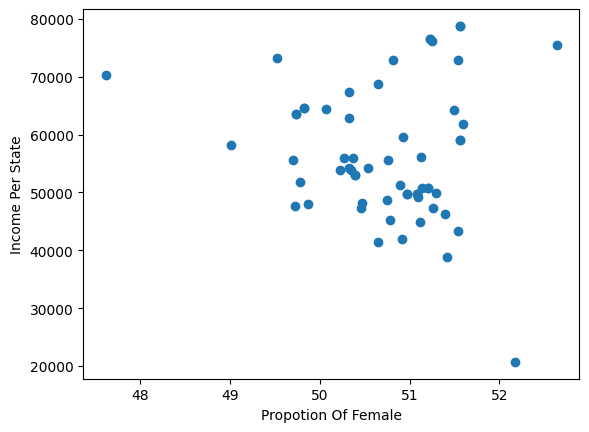

In [67]:
#Plotting for Women Proportion vs Income
from matplotlib import pyplot as plt
x = (us_census['Female']/us_census['TotalPop'])*100
y = us_census['Income']

plt.scatter(x,y)
plt.xlabel('Propotion Of Female')
plt.ylabel('Income Per State')
plt.show()

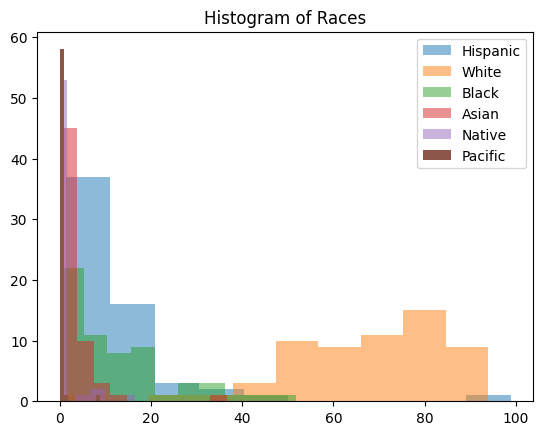

In [68]:
H = us_census['Hispanic']
W = us_census['White']
B = us_census['Black']
A = us_census['Asian']
N = us_census['Native']
P = us_census['Pacific']

plt.hist(H,alpha=0.5,label='Hispanic')
plt.hist(W,alpha=0.5,label='White')
plt.hist(B,alpha=0.5,label='Black')
plt.hist(A,alpha=0.5,label='Asian')
plt.hist(N,alpha=0.5,label='Native')
plt.hist(P,label='Pacific')
plt.legend(loc='upper right')
plt.title('Histogram of Races')

plt.show()